<IPython.core.display.Javascript object>


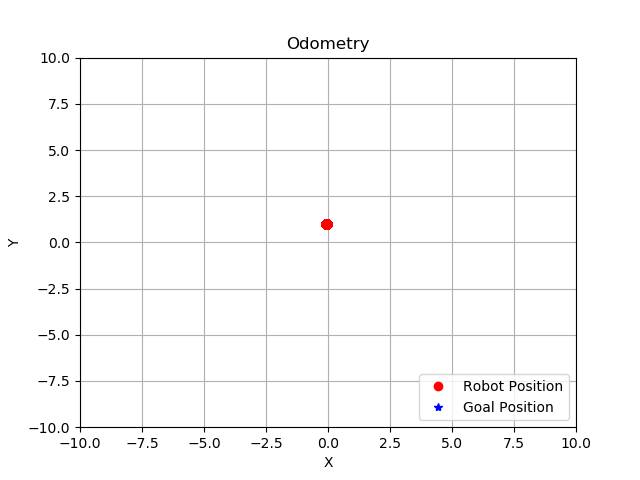

<IPython.core.display.Javascript object>


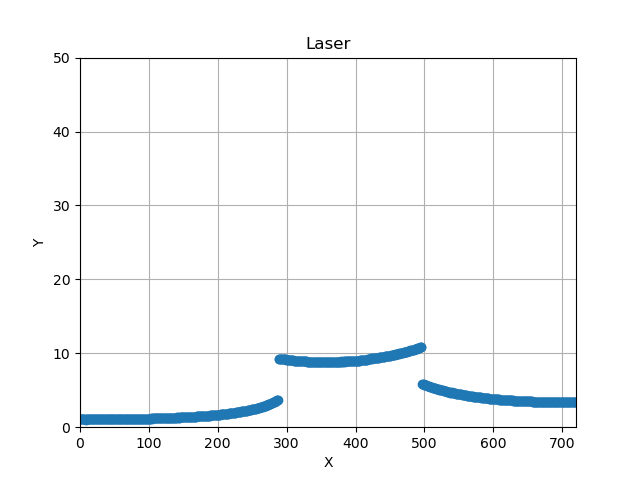

<IPython.core.display.Javascript object>


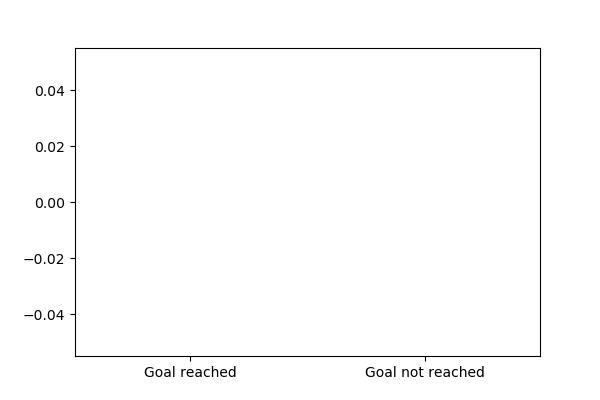

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import rospy
import tf
from my_assignment.msg import PlanningActionGoal, PlanningGoal, PlanningActionResult
from assignment_2_2022.msg import PlanningActionFeedback
from actionlib_msgs.msg import GoalStatusArray
from nav_msgs.msg import Odometry
from tf.transformations import quaternion_matrix 
import numpy as np
from matplotlib.animation import FuncAnimation
from sensor_msgs.msg import LaserScan
#import time

class Visualiser:
    
    def __init__(self):
        
        self.fig, self.ax = plt.subplots()
        self.ln_odom, = plt.plot([], [], 'ro',label="Robot Position")
        self.ln_goal, = plt.plot([], [], 'b*',label="Goal Position")
        plt.legend(handles=[self.ln_odom, self.ln_goal], loc="lower right")
        plt.grid(True)
        
        self.x_data_odom, self.y_data_odom = [] , []
        self.x_data_goal, self.y_data_goal= [], []
        
        self.fig2,self.ax2 = plt.subplots()
        self.ln2,= plt.plot([], [], 'o')
        plt.grid(True)
        
        self.laser=[]


    
    def plot_init(self):
        
        self.ax.set_title("Odometry")
        self.ax.set_xlim(-10, 10)
        self.ax.set_ylim(-10, 10)
        self.ax.set_xlabel("X")
        self.ax.set_ylabel("Y")
        
        self.ax2.set_title("Laser")
        self.ax2.set_xlim(0, 720)
        self.ax2.set_ylim(0,50)
        self.ax2.set_xlabel("X")
        self.ax2.set_ylabel("Y")

       
        
        return self.ln_odom, self.ln_goal, self.ln2
    
   
    def odom_callback(self, msg):
        
        self.y_data_odom.append(msg.pose.pose.position.y)
        self.x_data_odom.append(msg.pose.pose.position.x)
    
    def goal_cb(self, pos):
        
        self.y_data_goal.clear()
        self.x_data_goal.clear()
        
        self.y_data_goal.append(pos.goal.target_pose.pose.position.y)
        self.x_data_goal.append(pos.goal.target_pose.pose.position.x)
        #target_pose.pose.position.y
        #target_pose.pose.position.x
        
    def laser_cb(self,msg):
                 
        self.laser=list(msg.ranges)
        
        return self.laser
        
    def update_plot(self, frame):
        
        self.ln_odom.set_data(self.x_data_odom, self.y_data_odom)
        self.ln_goal.set_data(self.x_data_goal, self.y_data_goal)
        
        return self.ln_odom, self.ln_goal
    
    
    def update_plot2(self, frame):
        
        self.ln2.set_data(list(np.linspace(0,720,720)),self.laser)
        
        return self.ln2
    
    
    
rospy.init_node('visualiser_node')

vis = Visualiser()

sub1 = rospy.Subscriber('/odom', Odometry, vis.odom_callback)

sub2=rospy.Subscriber('/reaching_goal/goal',PlanningActionGoal,vis.goal_cb)

sub3=rospy.Subscriber('/scan',LaserScan,vis.laser_cb)

ani1_2 = FuncAnimation(vis.fig, vis.update_plot, init_func=vis.plot_init)

ani3= FuncAnimation(vis.fig, vis.update_plot2, init_func=vis.plot_init)

plt.show(block=True)

################################## PLOT GOALS REACHED AND NOT REACHED  ####################################

y1=0
y2=0


fig = plt.figure(figsize=(6,4))
plt.rcParams["figure.autolayout"] = True

b=plt.bar(["Goal reached", "Goal not reached"], [y1,y2], color=['blue','red'])


def res_cb(msg):
    
    global b, y1, y2
        
    if(msg.feedback.stat=='Target reached!'): 
        y1=y1+1
    elif(msg.feedback.stat=='Target cancelled!'):   # 4 5 9
        y2=y2+1 

def update_plot3(frame):
    
    global b, y1, y2
    
    b=plt.bar(["Goal reached", "Goal not reached"], [y1,y2], color=['blue','red'])


sub4=rospy.Subscriber('/reaching_goal/feedback',PlanningActionFeedback,res_cb)

ani4 = FuncAnimation(fig, update_plot3, interval = 100)

plt.show()

